<a href="https://colab.research.google.com/github/VictoriaOG1/ProyectoFinal_IA/blob/main/Proyecto6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tf_ds
from sklearn.model_selection import KFold
import math
import numpy as np

In [ ]:
#Download the dataset MNIST (numbers) 
datos, metadatos = tf_ds.load('mnist', as_supervised=True, with_info=True)

In [ ]:
#Obtain separate values for tranning and validation
train_data, test_data = datos['train'], datos['test']
X = np.array(list(map(lambda x: x[0], train_data)))
Y = np.array(list(map(lambda x: x[1], train_data)))

In [ ]:
#Tag the digits as labels 
names_number = metadatos.features['label'].names

In [ ]:
#Normalize function
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 #Pass RGB to grayscale
  return images, labels

#Normalize the train and test data with function
train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

#Add to cache
train_data = train_data.cache()
test_data = test_data.cache()

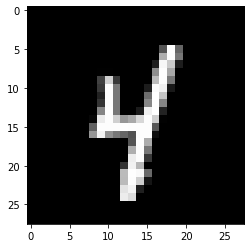

In [ ]:
#Show the image of train_data 
for image, label in train_data.take(1): 
  image = image.numpy().reshape((28,28)) #Redimension 

import matplotlib.pyplot as plt

#Draw the number
plt.figure()
plt.imshow(image, cmap='gray')
plt.colorbar
plt.grid(False)
plt.show()

In [ ]:
#Create model with a function
def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), 
    tf.keras.layers.Dense(1024, input_shape=(784,), activation=None),
    tf.keras.layers.Dense(1024, activation=tf.nn.sigmoid),
    tf.keras.layers.Dense(2048, input_shape=(1024,),activation=None), 
    tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, input_shape=(2048, ),activation=None) 
  ])
  model.compile(
      optimizer=tf.keras.optimizers.SGD(0.01),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy']
  )

  #Create Model
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - white and black 
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #For classification 
  ])

  #Compile Model
  model.compile(
      optimizer='adam', #Adam's algorithm
      loss=tf.keras.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy']
  )
  return model

In [ ]:
#Number of data of tranning and validation
num_tranning = metadatos.splits["train"].num_examples
num_tests = metadatos.splits["test"].num_examples 

In [ ]:
#K fold cross validation 
k=5
training_loss = [0,0,0,0,0] 
training_accuracy = [0,0,0,0,0] 
validation_loss = [0,0,0,0,0] 
validation_accuracy = [0,0,0,0,0]
weights =[]

for train_index, validation_index in KFold(k).split(X):
  #Partition
  x_train,x_validation=X[train_index],X[validation_index]
  y_train,y_validation=Y[train_index],Y[validation_index]

  #Create model
  modelo=create_model()
  
  #Training and validation (loss and accuracy values saved)
  training = modelo.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_validation, y_validation))

  training_loss = np.array(training_loss) + np.array(training.history["loss"])
  training_accuracy = np.array(training_accuracy) + np.array(training.history["accuracy"])
  validation_loss = np.array(validation_loss) + np.array(training.history["val_loss"])
  validation_accuracy = np.array(validation_accuracy) + np.array(training.history["val_accuracy"])
  
  modelo.save_weights


training_loss = training_loss/5
training_accuracy = training_accuracy/5
validation_loss = validation_loss/5
validation_accuracy = validation_accuracy/5

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.7502 - accuracy: 0.7553 - val_loss: 0.5544 - val_accuracy: 0.8600
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4633 - accuracy: 0.8841 - val_loss: 0.3756 - val_accuracy: 0.9049
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3630 - accuracy: 0.9096 - val_loss: 0.3641 - val_accuracy: 0.9124
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3261 - accuracy: 0.9193 - val_loss: 0.3475 - val_accuracy: 0.9162
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.9255 - val_loss: 0.3812 - val_accuracy: 0.9165
Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.7459 - accuracy: 0.7828 - val_loss: 0.5176 - val_accuracy: 0.8767
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4143 - accuracy: 0.8926 - val_loss: 0.3370 - val_accuracy: 0.9102

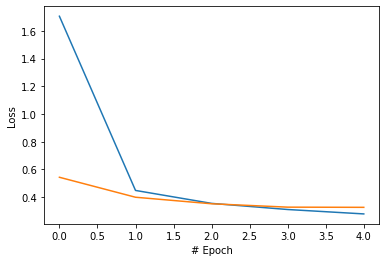

In [ ]:
#See the loss function of tranning and validation
plt.xlabel('# Epoch')
plt.ylabel("Loss")
plt.plot(training_loss)
plt.plot(validation_loss)

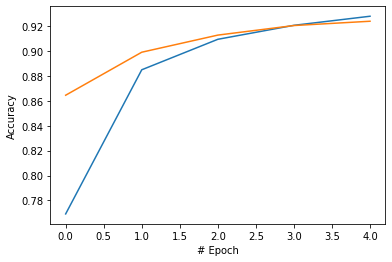

In [ ]:
#See the accuracy function of tranning and validation
plt.xlabel('# Epoch')
plt.ylabel("Accuracy")
plt.plot(training_accuracy)
plt.plot(validation_accuracy)